In [57]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from functools import reduce

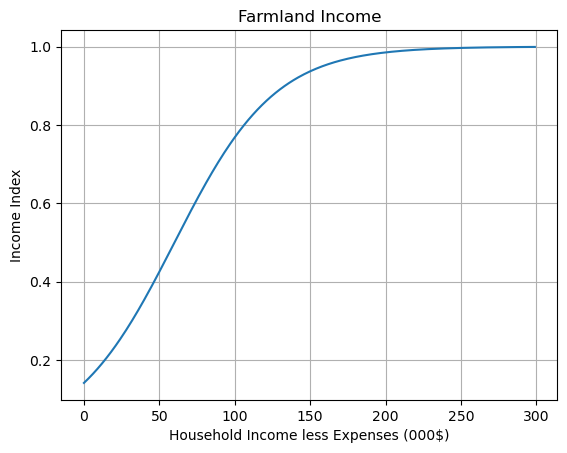

In [58]:
# measures whether a family is financially able to provide for a pet
def get_income_index_FARMLAND(income, required_income = 60000, steepness = -0.00003):
    return 1 / (1 + math.exp(steepness*(income-required_income)))

X = np.arange(0,300_000, 1_000)
Y = np.array([get_income_index_FARMLAND(x) for x in X])

plt.grid()
plt.title("Farmland Income")
plt.xlabel("Household Income less Expenses (000$)")
plt.ylabel("Income Index")
plt.plot(X/1_000,Y)

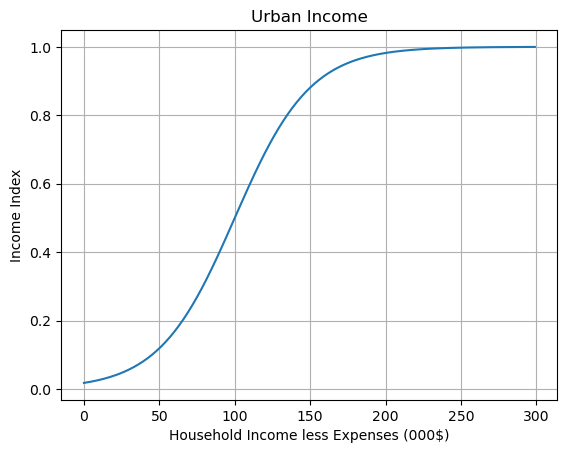

In [59]:
# measures whether a family is financially able to provide for a pet
def get_income_index_URBAN(income, required_income = 100000, steepness = -0.00004):
    return 1 / (1 + math.exp(steepness*(income-required_income)))

X = np.arange(0,300_000, 1_000)
Y = np.array([get_income_index_URBAN(x) for x in X])

plt.grid()
plt.title("Urban Income")
plt.xlabel("Household Income less Expenses (000$)")
plt.ylabel("Income Index")
plt.plot(X/1_000,Y)

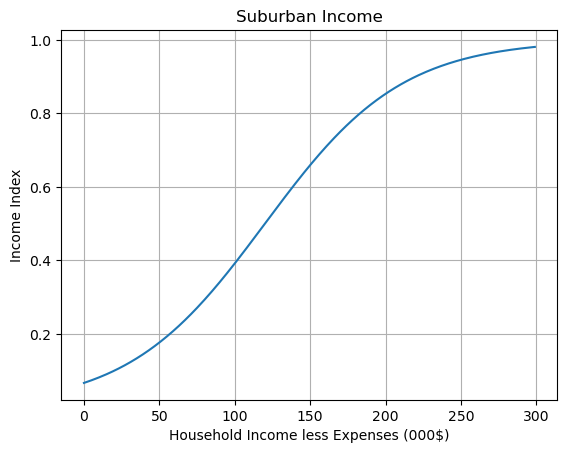

In [60]:
# measures whether a family is financially able to provide for a pet
def get_income_index_SUBURBAN(income, required_income = 120000, steepness = -0.000022):
    return 1 / (1 + math.exp(steepness*(income-required_income)))

X = np.arange(0,300_000, 1_000)
Y = np.array([get_income_index_SUBURBAN(x) for x in X])

plt.grid()
plt.title("Suburban Income")
plt.xlabel("Household Income less Expenses (000$)")
plt.ylabel("Income Index")
plt.plot(X/1_000,Y)

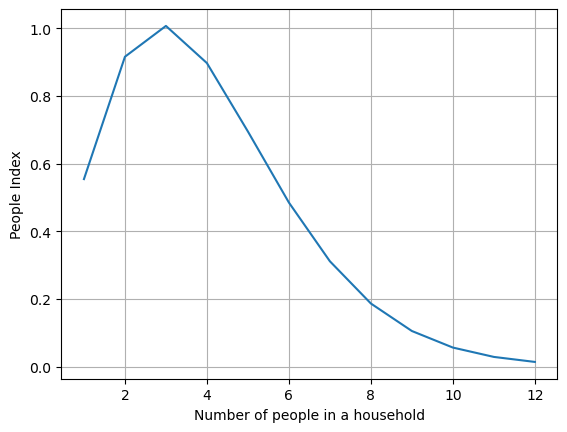

In [61]:
# measures whether there is sufficient space to fit a pet into the household
def get_people_index(number_of_people):
    # poisson distribution to obtain a suitable shape
    return 2 * math.exp(-0.7) * 0.7**(0.4*number_of_people-1) / math.gamma(0.4*number_of_people) 

# TODO:
# can convert to population densitry
# can do a hard cap on land area
# can do housing area in cases of ppl living on a farm

X = np.arange(1,13)
Y = np.array([get_people_index(x) for x in X])

plt.grid()
plt.xlabel("Number of people in a household")
plt.ylabel("People Index")
plt.plot(X,Y)

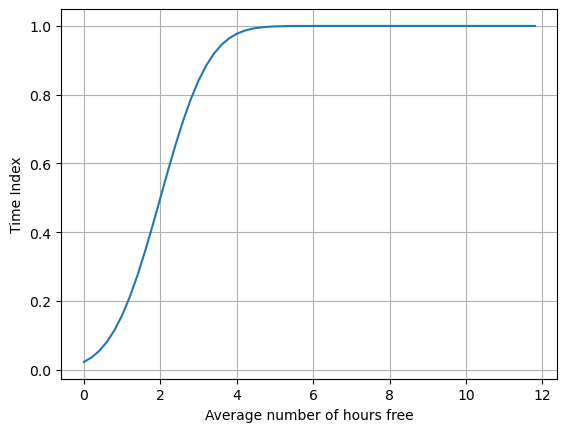

In [62]:
# measures whether someone has the time to take care of a pet
def get_time_index(owner_free_time, pet_time_requirement = 2, free_time_std = 1):
    z = (owner_free_time - pet_time_requirement) / free_time_std
    return norm.cdf(z)

X = np.arange(0, 12, 0.2)
Y = np.array([get_time_index(x) for x in X])

plt.grid()
plt.xlabel("Average number of hours free")
plt.ylabel("Time Index")
plt.plot(X,Y)

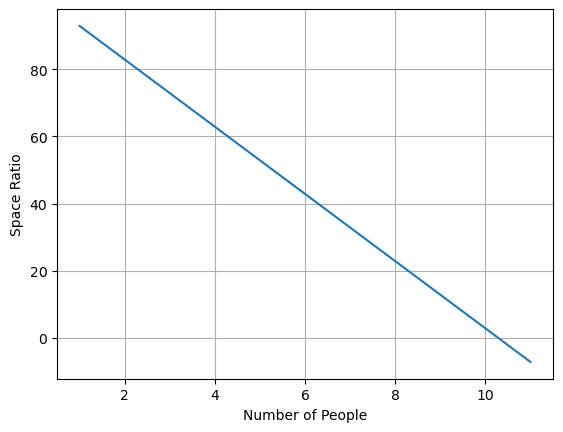

In [63]:
def get_space_ratio(floor_area, outside_area, people, space_for_pet = 2, neccesary_space = 0, space_per_person = 20):
    human_space = 0.6 * floor_area + 10*math.log10(outside_area+1) - neccesary_space - space_per_person*people - space_for_pet
    # space = 0.6 * floor_area + 10 * math.log10(outside_area + 1) 
    space_ratio = human_space / space_for_pet

    return space_ratio

X = np.arange(1, 12, 1)
Y = np.array([get_space_ratio(300, 600, x) for x in X])

plt.grid()
plt.xlabel("Number of People")
plt.ylabel("Space Ratio")
plt.plot(X,Y)

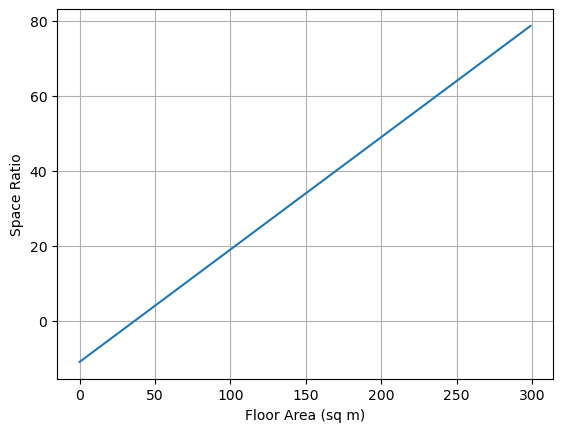

In [64]:
X = np.arange(0, 300, 1)
Y = np.array([get_space_ratio(x, 0, 1) for x in X])

plt.grid()
plt.xlabel("Floor Area (sq m)")
plt.ylabel("Space Ratio")
plt.plot(X,Y)

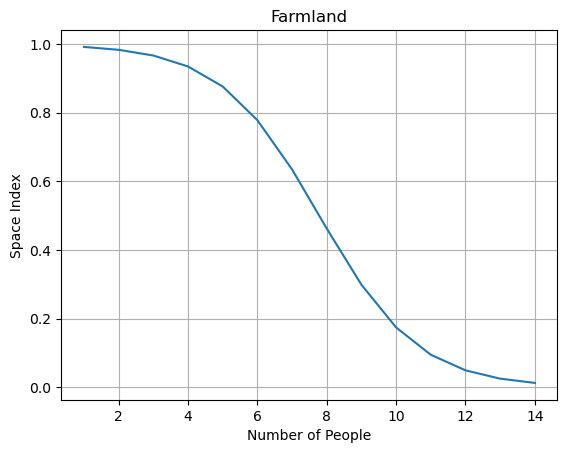

In [76]:
# FARM LAND
def get_space_index(floor_area, outside_area, people, population_density, space_for_pet = 2, neccesary_space = 10, space_per_person = 20):
    ratio = get_space_ratio(floor_area, outside_area, people, space_for_pet, neccesary_space, space_per_person)
    
    median = -0.00559007*population_density + 26.1558
    steepness = 0.0000275031*population_density + 0.0702201

    return 1/(1+math.exp(-steepness*(ratio-median)))

X = np.arange(1, 15, 1)
Y = np.array([get_space_index(300, 10000, x, 2.5) for x in X])

plt.grid()
plt.title("Farmland")
plt.xlabel("Number of People")
plt.ylabel("Space Index")
plt.plot(X,Y)


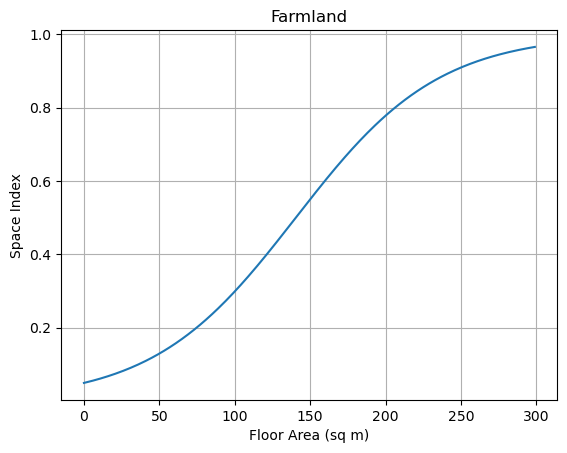

In [70]:
X = np.arange(0, 300, 1)
Y = np.array([get_space_index(x, 0, 1, 2.5) for x in X])

plt.grid()
plt.title("Farmland")
plt.xlabel("Floor Area (sq m)")
plt.ylabel("Space Index")
plt.plot(X,Y)

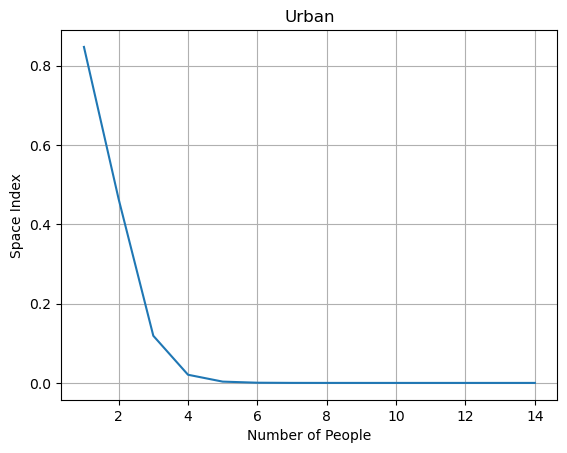

In [71]:
# def get_space_index_URBAN(floor_area, outside_area, people, space_for_pet = 2, neccesary_space = 10, space_per_person = 20):
   # ratio = get_space_ratio(floor_area, outside_area, people, space_for_pet, neccesary_space, space_per_person)
   # return 1/(1+math.exp(-0.2*(ratio-1)))

X = np.arange(1, 15, 1)
Y = np.array([get_space_index(80, 5, x, 4200) for x in X])

plt.grid()
plt.title("Urban")
plt.xlabel("Number of People")
plt.ylabel("Space Index")
plt.plot(X,Y)

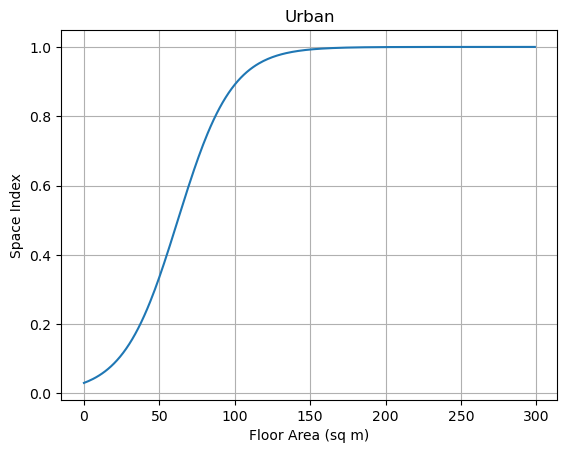

In [73]:
X = np.arange(0, 300, 1)
Y = np.array([get_space_index(x, 0, 1, 4200) for x in X])

plt.grid()
plt.title("Urban")
plt.xlabel("Floor Area (sq m)")
plt.ylabel("Space Index")
plt.plot(X,Y)

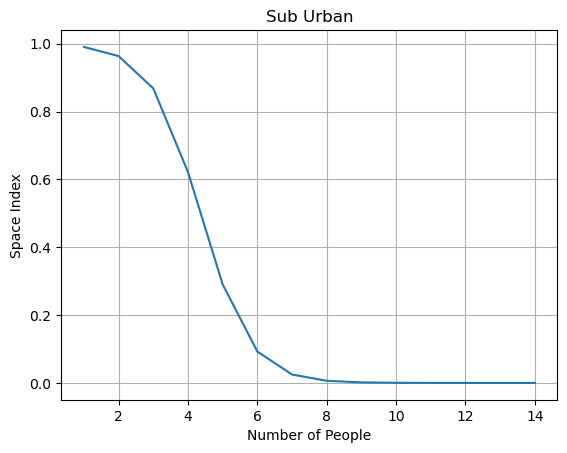

In [74]:
# def get_space_index_SUBURBAN(floor_area, outside_area, people, space_for_pet = 2, neccesary_space = 10, space_per_person = 20):
  #  ratio = get_space_ratio(floor_area, outside_area, people, space_for_pet, neccesary_space, space_per_person)
   # return 1/(1+math.exp(-0.115*(ratio-15)))

X = np.arange(1, 15, 1)
Y = np.array([get_space_index(160, 560, x, 2500) for x in X])

plt.grid()
plt.title("Sub Urban")
plt.xlabel("Number of People")
plt.ylabel("Space Index")
plt.plot(X,Y)

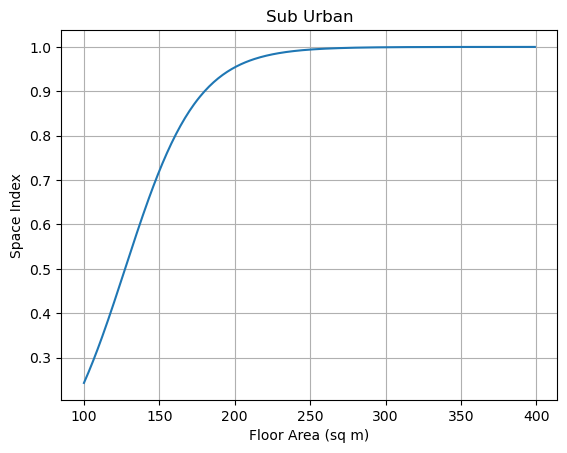

In [75]:
X = np.arange(100, 400, 1)
Y = np.array([get_space_index(x, 0, 2, 2500) for x in X])

plt.grid()
plt.title("Sub Urban")
plt.xlabel("Floor Area (sq m)")
plt.ylabel("Space Index")
plt.plot(X,Y)

In [ ]:
# ---- params ----

# income
income = 80 * 1_000
required_income = 75_000
income = 80 * 1_000

# space parameters
people = 3
outside_area = 600
floor_area = 300
pet_area = 2

# amount of time that can be spent on the pet
# std = 1
free_time = 5
pet_time = 2

In [ ]:
income_index = get_income_index(income)
people_index = get_people_index(people)
time_index = get_time_index(free_time, pet_time)

income_index, people_index, time_index

(0.31002551887238755, 1.0072121650627774, 0.9986501019683699)

In [ ]:
fitness_index = 1/3 * income_index + 1/3 * people_index + 1/3 * time_index
fitness_index

0.7719625953011783

In [ ]:
def get_fitness_index(income, required_income, people, outside_area, floor_area, pet_area, free_time, pet_time):
    income_index = get_income_index_(income, required_income)
    space_index = get_space_index(floor_area, outside_area, people, pet_area)
    time_index = get_time_index(free_time, pet_time)

    return income_index, space_index, time_index

In [ ]:
F = get_fitness_index(income, required_income, people, outside_area, floor_area, pet_area, free_time, pet_time)
F

(0.549833997312478, 0.9495372286328053, 0.9986501019683699)

In [ ]:
reduce(lambda x,y: x*y, F) ** (1/len(F))

0.8048574697980402

In [ ]:
F = get_fitness_index(67046, 37792, 1, 0, 80, 1.6, 5, 2)
F

(0.7631739352613004, 0.2465647929264015, 0.9986501019683699)

In [ ]:
reduce(lambda x,y: x*y, F) ** (1/len(F))

0.5727819380466975